## 00_EDA
#### Machine Learning
##### Gonzalo Rodríguez Cañada


## Data Sourcing



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
import seaborn as sns

In [2]:
#we create the dataframes with the function pd.read_csv since we start from files in this format

diamonds = pd.read_csv('../data/01_raw/diamonds.csv',delimiter = ',')  #We indicate that the separator is the comma


In [3]:
diamonds.head(10)

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0           1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1           2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2           3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3           4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4           5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
5           6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
6           7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95   
7           8   0.26  Very Good     H     SI1   61.9   55.0    337  4.07   
8           9   0.22       Fair     E     VS2   65.1   61.0    337  3.87   
9          10   0.23  Very Good     H     VS1   59.4   61.0    338  4.00   

      y     z  
0  3.98  2.43  
1  3.84  2.31  
2  4.07  2.31  
3  4.23  2.63  
4  4.35  2.75  
5  3.96  2.48  
6  3.98  2.47  
7  4.11  2.53  
8  3.78  2.49  
9  4.05  2.39

In [4]:
diamonds.tail(10)

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
53930       53931   0.71    Premium     E     SI1   60.5   55.0   2756  5.79   
53931       53932   0.71    Premium     F     SI1   59.8   62.0   2756  5.74   
53932       53933   0.70  Very Good     E     VS2   60.5   59.0   2757  5.71   
53933       53934   0.70  Very Good     E     VS2   61.2   59.0   2757  5.69   
53934       53935   0.72    Premium     D     SI1   62.7   59.0   2757  5.69   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
53930  5.74  3.49  
53931  5.73  3.43  
53932  5.76  3.47  
53933  5.72  3.49  
53934  5.73  3.58  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64

In [5]:
diamonds.shape #in order to observe the number of rows and columns of our dataset

(53940, 11)

In [6]:
diamonds.cut.unique() #To know the different type of qualities

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [7]:
#Let's get an idea of how many we have of each
diamonds.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

## Data Cleaning

In [8]:
diamonds. isnull(). sum() #theres no NaN

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [9]:
diamonds.iloc[:,0] = diamonds.iloc[:,0].astype('str')#we dont want the index to be in the summary so we conver in object
 # a summary of the numeric columns to have an idea of the range of the values.

In [10]:
duplicated_values = diamonds[diamonds.duplicated()]
print(duplicated_values) #theres no duplicated values


Empty DataFrame
Columns: [Unnamed: 0, carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []


In [11]:
diamonds1 = diamonds.rename(columns={'Unnamed: 0': 'Index','z':'depth_mm','x':'length_mm','y':'width_mm','depth':'depth_%'})
# Changing the name of the column.



In [12]:
diamonds1.info() #in order to know the Dtype, and confirming Index has an object Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      53940 non-null  object 
 1   carat      53940 non-null  float64
 2   cut        53940 non-null  object 
 3   color      53940 non-null  object 
 4   clarity    53940 non-null  object 
 5   depth_%    53940 non-null  float64
 6   table      53940 non-null  float64
 7   price      53940 non-null  int64  
 8   length_mm  53940 non-null  float64
 9   width_mm   53940 non-null  float64
 10  depth_mm   53940 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


In [13]:
diamonds1.describe() #Here we can see a quick summary of the numercical features

carat       depth_%         table         price     length_mm  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

           width_mm      depth_mm  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

## Data Visualization

## Numerical features


#### Correlation matrix

In [ ]:
corr = diamonds1.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f,ax = plt.subplots(figsize=(15,15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5})

Correlation matrix shows how our features are related. As is observed,there is a strong correlation between the weight of our diamond with the dimensions and the price, as was commented previously.Additionally, as is expected theres a high correlation between the dimensions of our diamond. 

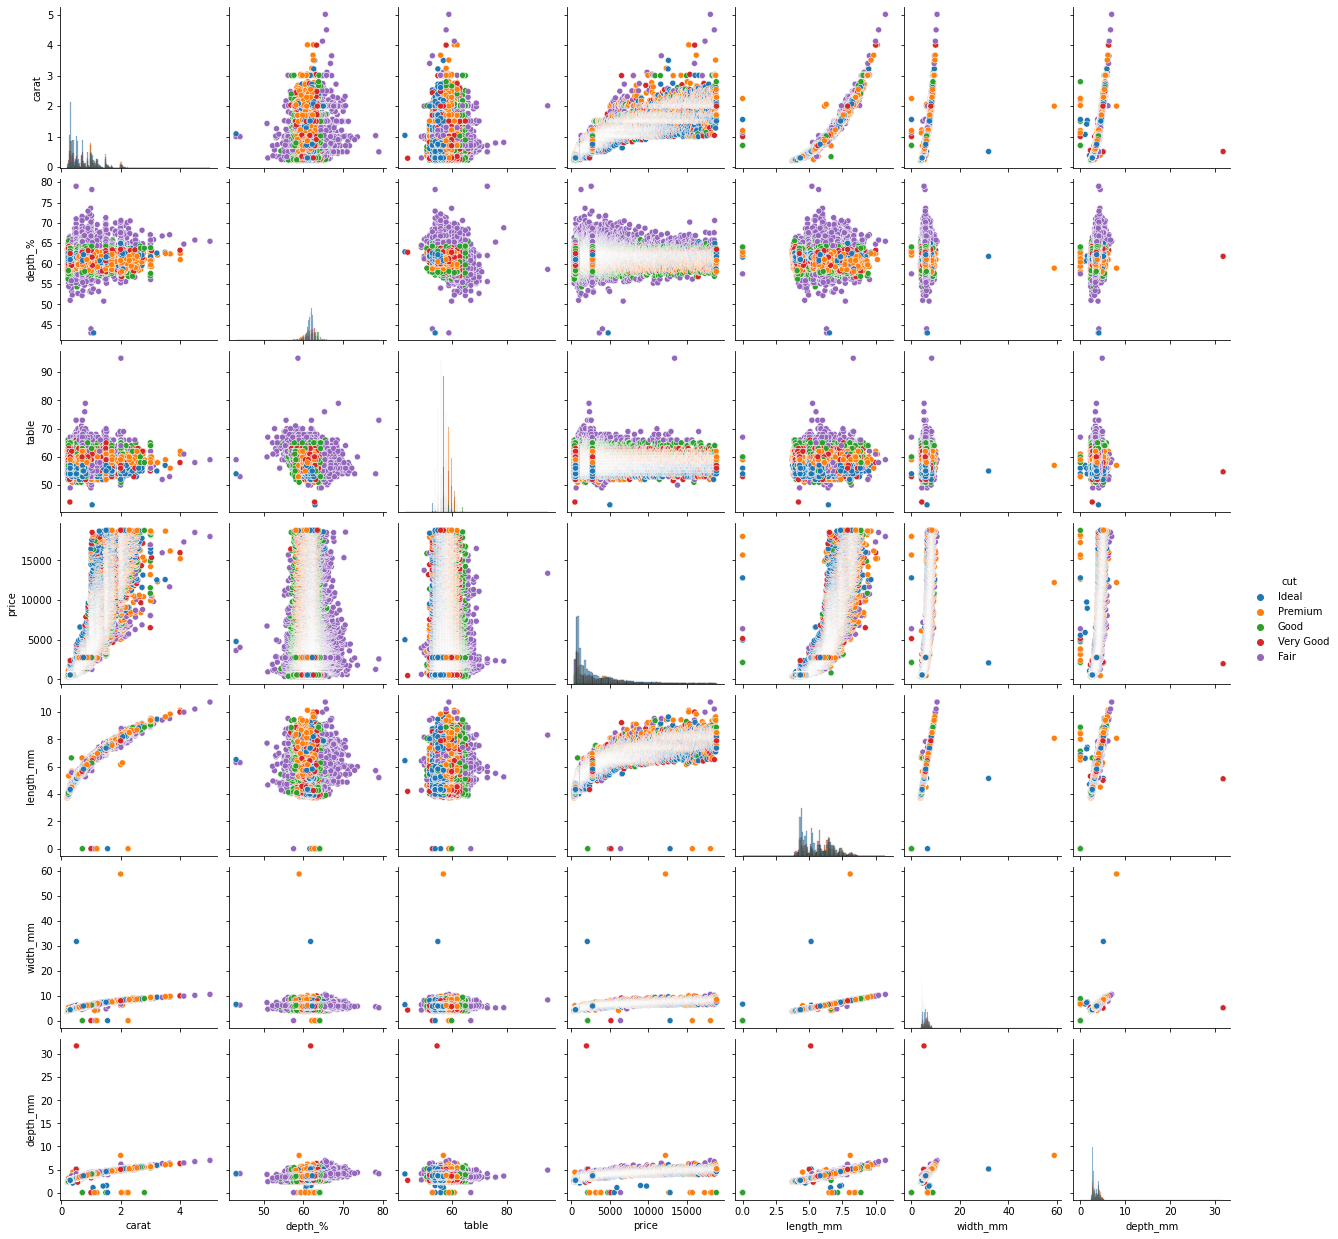

In [16]:
sns.pairplot(diamonds1, hue="cut", diag_kind="hist")

Pair-plots are way to see relationships between each variable. It produces a matrix of relationships between each variable.

#### Histograms 

Let's take a look about how data is distributed as function of the cut which represent the quality of the diamond.

Text(0.5, 6.79999999999999, 'Weight of the diamond in grams')

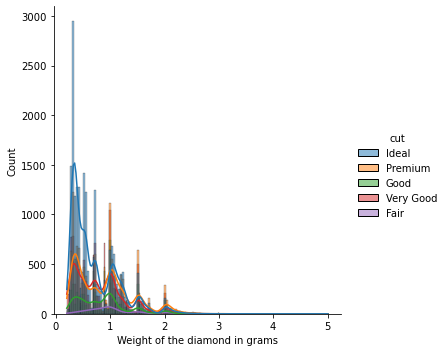

In [17]:
sns.displot(diamonds1, x="carat", hue="cut",kde=True)
plt.xlabel('Weight of the diamond in grams')

Text(0.5, 6.79999999999999, 'Depth percentage')

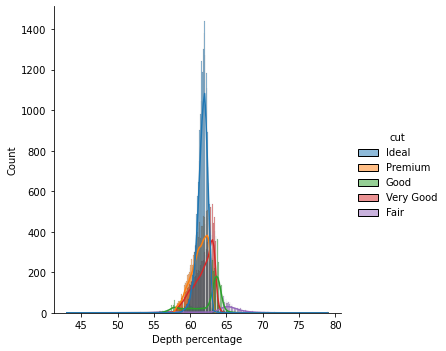

In [18]:
sns.displot(diamonds1, x="depth_%", hue="cut",kde=True)
plt.xlabel('Depth percentage')

Text(0.5, 6.79999999999999, 'Table percentage')

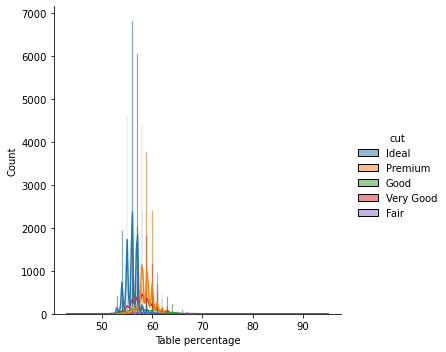

In [19]:
sns.displot(diamonds1, x="table", hue="cut",kde=True)
plt.xlabel('Table percentage')

Text(0.5, 6.79999999999999, '$')

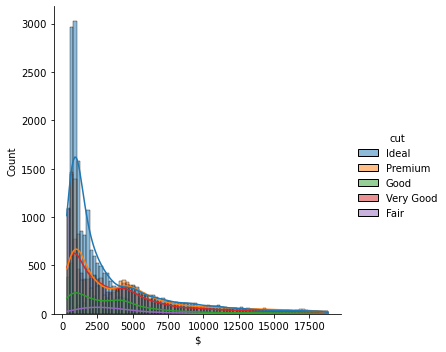

In [20]:
sns.displot(diamonds1, x="price", hue="cut",kde=True)
plt.xlabel('$')

Text(0.5, 6.79999999999999, 'Length in mm')

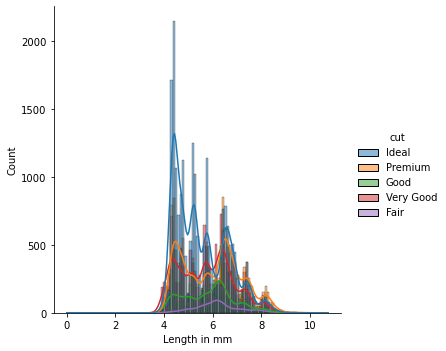

In [21]:
sns.displot(diamonds1, x="length_mm", hue="cut",kde=True)
plt.xlabel('Length in mm')

Text(0.5, 6.79999999999999, 'Width in mm')

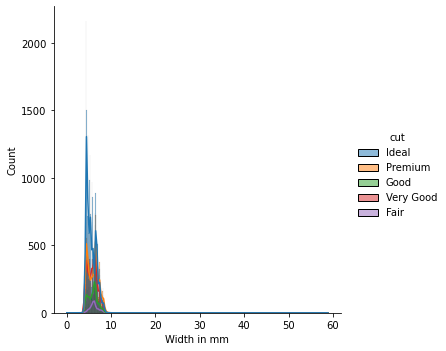

In [22]:
sns.displot(diamonds1, x="width_mm", hue= "cut",kde=True)
plt.xlabel('Width in mm')

Text(0.5, 6.79999999999999, 'Depth in mm')

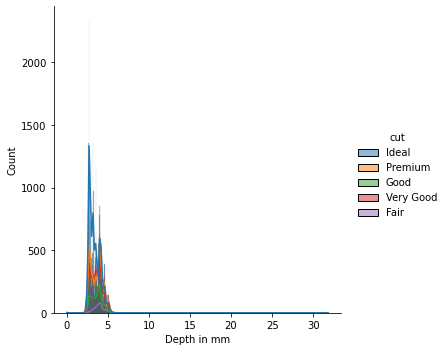

In [23]:
sns.displot(diamonds1, x="depth_mm", hue="cut",kde=True)
plt.xlabel('Depth in mm')

## Categorical features

##### Boxplots

The boxplots depict groups of numerical data through their quantiles.

<AxesSubplot:xlabel='cut', ylabel='price'>

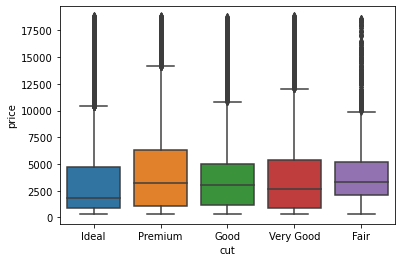

In [24]:
sns.boxplot(x='cut',y='price',data=diamonds1)

From this boxplot can be observed that except for ideal cut, the lower is the quality, there are more outliers. Moreover, each type of cut has the same minimum and maximum price.

<AxesSubplot:xlabel='clarity', ylabel='price'>

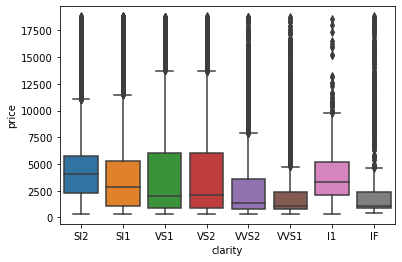

In [25]:
sns.boxplot(x='clarity',y='price',data=diamonds1)
 

No trend can be drawn from this graph, however,each type of cut has the same minimum and maximum price.

<AxesSubplot:xlabel='color', ylabel='price'>

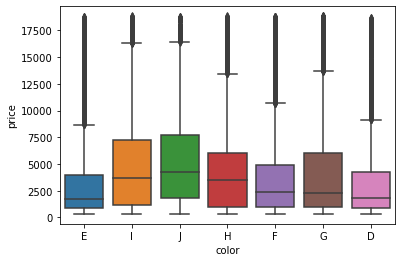

In [26]:
sns.boxplot(x='color',y='price',data=diamonds1)
 

From this boxplot can be observed that except for G, the better is the quality of the color, there are more outliers. Moreover, each type of cut has the same minimum and maximum price.

#### Count plots

<AxesSubplot:xlabel='cut'>

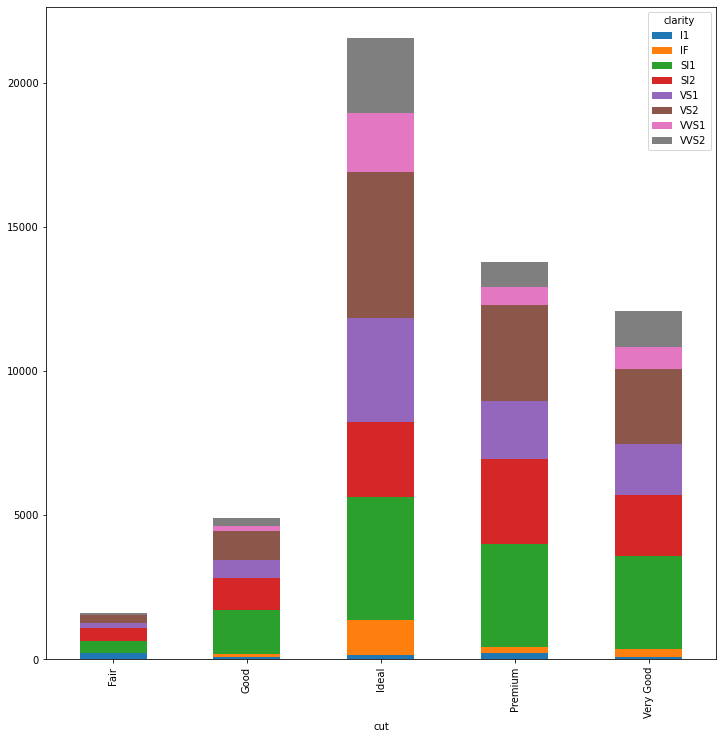

In [27]:
cut_clarity_table = pd.crosstab(index=diamonds1["cut"], columns=diamonds1["clarity"])

cut_clarity_table.plot(kind="bar", 
                 figsize=(12,12),
                 stacked=True)

As it observed that quality of cut if the parameter that drives people to buy the diamond,regardless the quality.

<AxesSubplot:xlabel='color'>

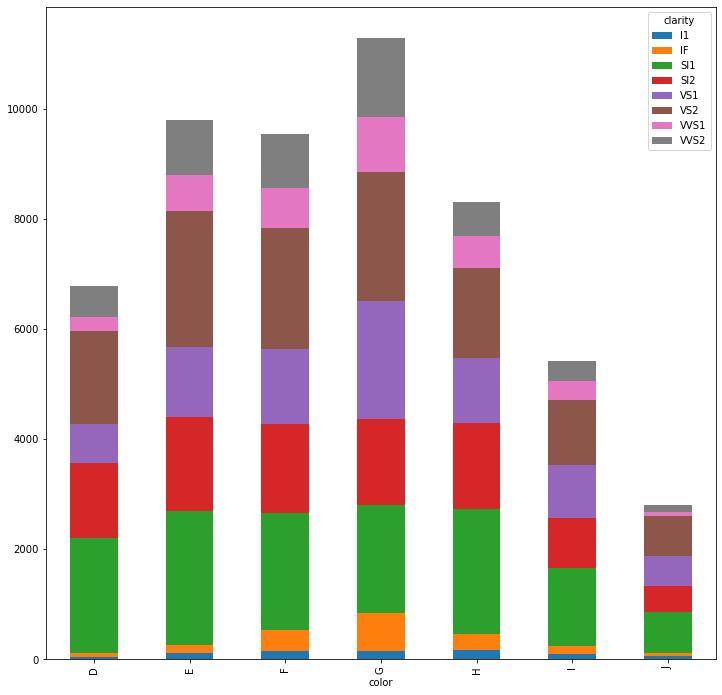

In [28]:
color_clarity_table = pd.crosstab(index=diamonds1["color"], columns=diamonds1["clarity"])

color_clarity_table.plot(kind="bar", 
                 figsize=(12,12),
                 stacked=True)


People prefer G and  E colour over the others, as well as the the most sought clarities are VS2 and SI1.

<AxesSubplot:xlabel='clarity'>

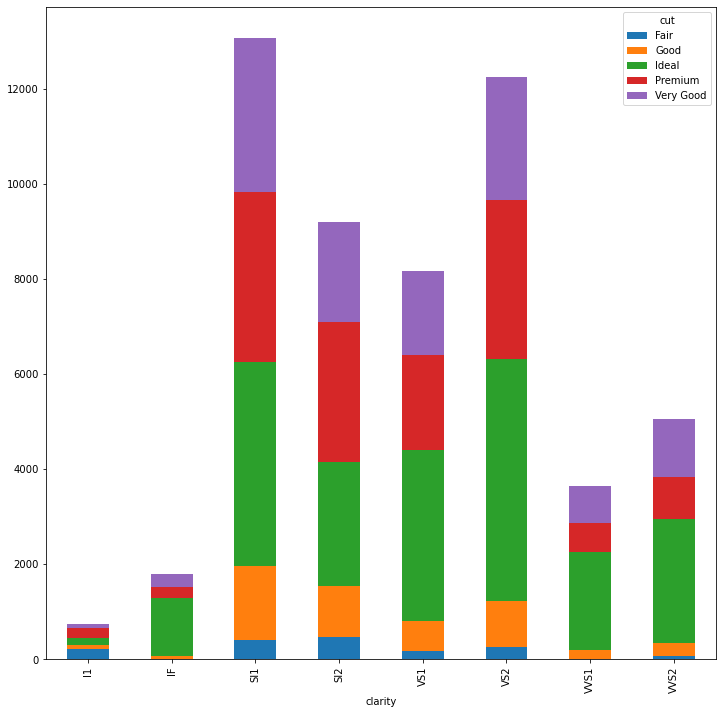

In [29]:
clarity_cut_frame = pd.crosstab(index=diamonds1["clarity"], columns=diamonds1["cut"])

clarity_cut_frame.plot(kind="bar", 
                 figsize=(12,12),
                 stacked=True)

The most bought diamonds are the ones with the clarity SI1 and VS2,with an ideal cut, followed closely by the premium cut, nonetheless, it is observed that people preffer to choose by color instead of clarity. 

# Profile Report

In [30]:
profile = ProfileReport(diamonds1,title='EDA of Diamonds Dataset')
profile